In [2]:
import bs4
import jieba
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
print ("載入完成")

載入完成


In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
X,y = digits.data, digits.target

print("data shape: %r, target shape: %r" %(X.shape, y.shape))
print("classes: %r" % list(np.unique(y)))

n_samples, n_features = X.shape

data shape: (1797, 64), target shape: (1797,)
classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [7]:
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(n_components = 2)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(1797, 2)


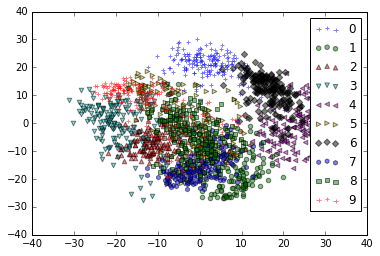

In [9]:
from itertools import cycle

%matplotlib inline
colors = ['b','g','r','c','m','y','k']
markers = ['+', 'o', '^', 'v', '<', '>', 'D', 'h', 's']
for i,c,m in zip(np.unique(y),cycle(colors),cycle(markers)):
    plt.scatter(
        X_pca[y == i,0],
        X_pca[y == i,1],
        c=c,
        marker=m,
        label=i,
        alpha=0.5
    )
plt.legend(loc='best')
plt.show()

In [11]:
from sklearn.svm import SVC       # support vector classification (SVC演算法)
print (SVC().fit(X, y).score(X, y)) # 用X去training, 然後對y作test, 給出預測正確的比例
                                  # fit是實行訓練, score是計算測試結果
                                  # 結果1.0要注意過度訓練的情形(overfitting)

1.0


In [17]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2 ,random_state=0)

print('train data shape: %r, train target shape:%r'%(X_train.shape,y_train.shape))
print('test data shape: %r, train target shape:%r'%(X_test.shape,y_test.shape))

train data shape: (1437, 64), train target shape:(1437,)
test data shape: (360, 64), train target shape:(360,)


In [18]:
print (SVC().fit(X_train, y_train).score(X_train, y_train))

1.0


In [19]:
SVC().fit(X_train,y_train).score(X_test,y_test) # 準度剩下0.325表示overfitting的可能性非常大

0.32500000000000001

### SVC 參數預設的值是 C = 100, gamma = 0, 通常這兩個參數會大大影響整體的效果 透過cross validation與Grid找出適合的參數是調校ML的必要工作

In [22]:
from sklearn.cross_validation import ShuffleSplit # 隨機分割組別的套件
cv = ShuffleSplit(n_samples, n_iter=3, test_size=0.1, random_state=0)
# n_iter = 3 表示要產生3組不同的分組方式
# test_size=0.1 表示每組的test set占全部資料的10%

print (type(cv))
print (len(cv))

<class 'sklearn.cross_validation.ShuffleSplit'>
3


In [21]:
from sklearn.cross_validation import ShuffleSplit
cv = ShuffleSplit(n_samples,n_iter=3,test_size=0.1,random_state=1)

for cv_index ,(train,test) in enumerate(cv):
    print("# Cross Validation Iteration #%d" %cv_index)
    print("Train indices: {0}...".format(train[:10]))
    print("Test indices: {0}...".format(test[:10]))
    
    svc = SVC(kernel="rbf",C=100,gamma=0.0).fit(X[train],y[train])
    print("train score:{0:.3f},test score:{1:.3f}\n".format(
        svc.fit(X[train],y[train]).score(X[train],y[train]),
        svc.fit(X[train],y[train]).score(X[test],y[test])))

# Cross Validation Iteration #0
Train indices: [1533 1473 1102  807 1089 1617  133 1641 1382 1216]...
Test indices: [1227 1576  202 1184  428  941  598  267  102 1456]...


C:\Users\JAMES\Anaconda3\lib\site-packages\sklearn\svm\base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)


train score:1.000,test score:0.561

# Cross Validation Iteration #1
Train indices: [ 458 1273  181  286 1686  442  349  943 1541  811]...
Test indices: [1156 1232   93 1220 1060 1491  757  393 1307 1519]...


C:\Users\JAMES\Anaconda3\lib\site-packages\sklearn\svm\base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)


train score:1.000,test score:0.594

# Cross Validation Iteration #2
Train indices: [ 384 1309  257  410 1664  943 1272 1169  675 1028]...
Test indices: [  28 1662  969  407  750  280  758  383  419    4]...


C:\Users\JAMES\Anaconda3\lib\site-packages\sklearn\svm\base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)


train score:1.000,test score:0.506



### 用套件分組+跑cv算test score的自動化流程套件

In [23]:
from sklearn.cross_validation import cross_val_score

cv = ShuffleSplit(n_samples,n_iter=10 ,test_size=0.1,random_state=0) # 分十組

test_scores = cross_val_score(svc,X,y,cv=cv,n_jobs=2) #default svc 去計算10組的結果

print(test_scores)

C:\Users\JAMES\Anaconda3\lib\site-packages\sklearn\svm\base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)
C:\Users\JAMES\Anaconda3\lib\site-packages\sklearn\svm\base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)
C:\Users\JAMES\Anaconda3\lib\site-packages\sklearn\svm\base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)
C:\Users\JAMES\Anaconda3\lib\site-packages\sklearn\svm\base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)
C:\Users\JAMES\Anaconda3\lib\site-packages\sklearn\s

[ 0.41111111  0.57777778  0.58888889  0.52222222  0.48333333  0.61666667
  0.56666667  0.55        0.50555556  0.62777778]


### 用scipy計算基本統計數據, 統計上面的10筆結果

In [25]:
from scipy.stats import sem 

def mean_score(scores):
    """Print the empirical mean score and standard error of the mean."""
    return("Mean score:{0:.3f}(+/-{1:.3f})").format(np.mean(scores),sem(scores))
# sem(list) list內只能是數值資料, 算出標準差傳回

print(mean_score(test_scores)) # 10組test score平均值 加減一個標準差範圍

Mean score:0.545(+/-0.021)



使用Grid套件來尋找適合的C與gamma值...

np.logspace(起始值,結束值,sample數,是否包含終點值,底數)

起始值,結束值型態為float, sample數為int,

是否包含終點值為booling, 預設True

底數預設為10.0

In [26]:
from sklearn.grid_search import GridSearchCV
from pprint import pprint

svc_params = {
    'C':np.logspace(-1,2,4),
    'gamma':np.logspace(-4,0,5),    # 測試範圍(-1~2或-4~0)是作者依照經驗判斷給定的
}
n_subsamples = 500
X_small_train, y_small_train = X_train[:n_subsamples],y_train[:n_subsamples]
# X共有1797組資料, 取0~500資料

gs_svc = GridSearchCV(SVC(),svc_params, cv=10 ,n_jobs=-1)
# cv=10表示作10次分組交叉測試

gs_svc.fit(X_small_train, y_small_train) # 加入Grid版本的 SVC().fit()

print(gs_svc.best_params_,gs_svc.best_score_)

{'gamma': 0.001, 'C': 1.0} 0.98


手動做完GridSearchCV作的事情, 用來理解整個求出最佳值的過程:

先固定C值觀察gamma值對score的變化;

接著固定gamma觀察C值對score的變化;

np.zeros((n,m), type)

(n,m) 這會傳回一個n*m的ndarray, 元素全部都是0

type 用來指定numpy型態,如numpy.int8, 預設是numpy.float64

參考資料 help(np.zeros)

In [29]:
np.zeros((2,3), np.int8)

array([[0, 0, 0],
       [0, 0, 0]], dtype=int8)

In [32]:
n_gammas = 10
n_iter = 5
cv = ShuffleSplit(n_samples,n_iter=n_iter,train_size=500, test_size=500, random_state=0)

train_scores = np.zeros((n_gammas, n_iter)) # 產生空陣列用來裝值
test_scores = np.zeros((n_gammas, n_iter))
gammas = np.logspace(-7,-1,n_gammas)

for i, gamma in enumerate(gammas):
    for j,(train,test) in enumerate(cv):
        clf = SVC(C=10, gamma=gamma).fit(X[train],y[train])
        # SVC().fit() 令C=10,gamma從10**-7~10**-1, 固定C值觀察gamma的變化
        
        train_scores[i,j] = clf.score(X[train],y[train]) # SVC().fit().score()
        test_scores[i,j] = clf.score(X[test],y[test])

matplotlib.text(x,y,s,fontdict)

x,y 訂出字串在圖上的座標位置

s 要加到圖上的字串

fontdict 設定字串的格式,可用bbox=dict(facecolor='red', alpha=0.5,fontsize=16)的方式設定

bbox對matplotlib而言是關鍵字

參考資料 help(matplotlib.text)

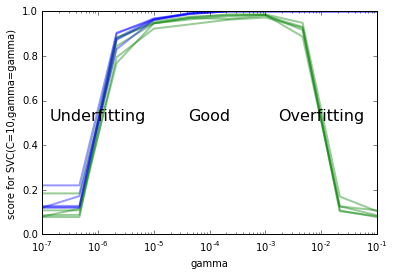

In [34]:
for i in range(n_iter):  # 產生圖表觀察gamma變化
    plt.semilogx(gammas ,train_scores[:,i] ,alpha=0.4 ,lw=2 ,c='b')# train是藍線
    plt.semilogx(gammas ,test_scores[:,i] ,alpha=0.4 ,lw=2 ,c='g')# test是綠線
plt.ylabel("score for SVC(C=10,gamma=gamma)")
plt.xlabel("gamma")
plt.text(1e-6, 0.5, "Underfitting",fontsize=16, ha='center', va='bottom')
plt.text(1e-4, 0.5, "Good",fontsize=16, ha='center', va='bottom')
plt.text(1e-2, 0.5, "Overfitting",fontsize=16, ha='center', va='bottom')
plt.show()

# 綠線的score越高越好,也就是Good區段的gamma值能得到較高的tes_score, 目測gamma約在10^-3時有最高的score

前面是固定C 觀察gamma

接著固定gamma 觀察C

科學記號:1e-3 = 10^-3 = 0.001; 1e3 = 10^3 = 1000

In [35]:
n_Cs = 10 
n_iter = 5
cv = ShuffleSplit(n_samples,n_iter=n_iter,train_size=500, test_size=500, random_state=0)

train_scores = np.zeros((n_Cs, n_iter)) 
test_scores = np.zeros((n_Cs, n_iter))
Cs = np.logspace(-5,5,n_Cs)

for i, C in enumerate(Cs):
    for j,(train,test) in enumerate(cv):
        clf = SVC(C=C, gamma=1e-3).fit(X[train],y[train])
        # SVC().fit() 令gamma=1*0.001, 觀察C從10**-5~10**5
        
        train_scores[i,j] = clf.score(X[train],y[train]) 
        test_scores[i,j] = clf.score(X[test],y[test])

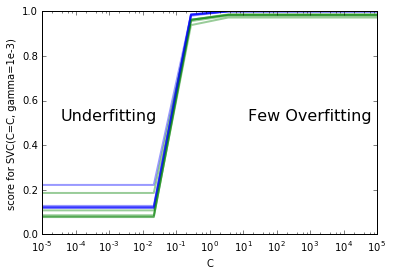

In [36]:
for i in range(n_iter):
    plt.semilogx(Cs, train_scores[:, i], alpha=0.4, lw=2, c='b')
    plt.semilogx(Cs, test_scores[:, i], alpha=0.4, lw=2, c='g')
plt.ylabel("score for SVC(C=C, gamma=1e-3)")
plt.xlabel("C")
plt.text(1e-3, 0.5, "Underfitting", fontsize=16, ha='center', va='bottom')
plt.text(1e3, 0.5, "Few Overfitting", fontsize=16, ha='center', va='bottom')
plt.show()

# 同樣是綠線的score越高越好, 目測C在10^1~10^2就達到score=1.0

綜合兩張圖的結論, gamma在10^-3且C在10^1~10^2最好

與GridSearchCV算出的結論{'C': 1.0, 'gamma': 0.001}相近

In [37]:
svc_2 = SVC(kernel='rbf', C=10, gamma=0.001).fit(X_train,y_train) #將GridSearchCV算出的結果代入SVC
train_score = svc_2.score(X_train, y_train)
print(train_score)

test_score = svc_2.score(X_test,y_test)
print(test_score)

# test_score = 0.99166...

1.0
0.991666666667


KFold(資料數量,K次,shuffle,random_state)

SVC(C,kernel,gamma)

kernel有linear, poly, rbf, sigmoid, precomputed這幾種可選, 也可放入自定義的陣列(n_samples, n_samples)

參考資料:help(SVC)